# Stats 2016 vs 2017

In [1]:
# Répertoire du fichier en local
CT_DIR_DATA = 'C:/Users/Mscao/OneDrive - INTESCIA/export'

## Chargement

In [5]:
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import time

In [6]:
# Lecture
df = pd.read_csv(CT_DIR_DATA + 'stats_2016_2017.csv', sep=";", na_values=r"\0")
print(df.shape)
print(len(set(df.siren)), 'SIREN avec un historique antérieur à 2016')

df.head()

(865572, 6)
865572 SIREN avec un historique antérieur à 2016


,siren,indiScore2016,indiScoreDate2016,indiScore2017,indiScoreDate2017,procol
0,443,0,2014-05-05,0,2014-05-05,NaN
1,512,0,2015-09-01,0,2015-09-01,NaN
2,765,0,2015-09-02,0,2015-09-02,NaN
3,891,0,2015-03-24,0,2015-03-24,NaN
4,4564,0,2014-10-01,0,2014-10-01,NaN


## SIREN positifs en 2016

In [7]:
# On travaille sur les SIREN positifs en 2016
df = df[df['indiScore2016']>0]
print(len(df), 'SIREN avec un score positif au 01-01-2016')
df.head()

718295 SIREN avec un score positif au 01-01-2016


,siren,indiScore2016,indiScoreDate2016,indiScore2017,indiScoreDate2017,procol
18,5420120,9,2015-06-23,9,2015-06-23,NaN
19,5450093,13,2014-06-15,14,2016-08-17,NaN
20,5480546,6,2015-09-19,6,2016-05-12,P
21,5520028,12,2013-12-28,12,2013-12-28,NaN
22,5520176,16,2015-08-26,16,2016-06-22,NaN


In [34]:
stats = df.groupby('indiScore2016')['siren'].aggregate('count').reset_index().sort_values('indiScore2016', ascending=True)
stats

,indiScore2016,siren
0,1,632
1,2,10760
2,3,36382
3,4,23296
4,5,26053
5,6,47855
6,7,27714
7,8,55686
8,9,60747
9,10,54206


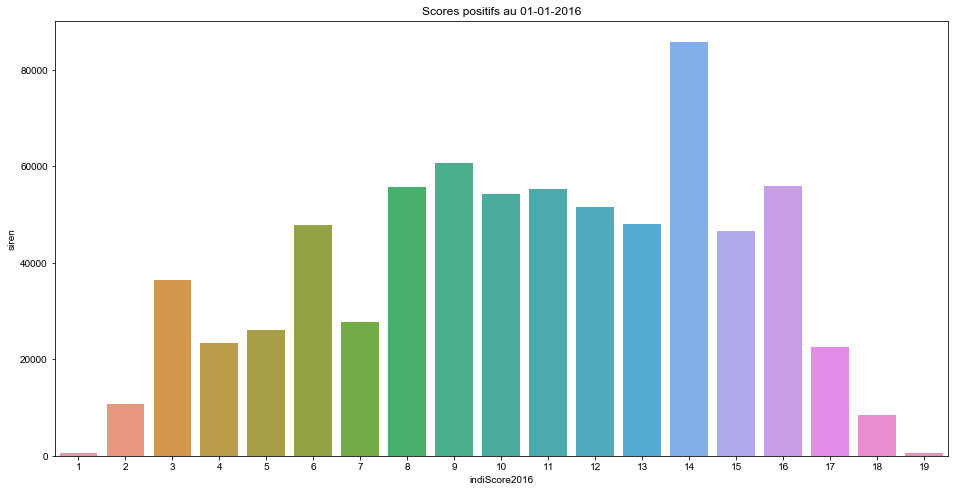

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(stats.indiScore2016, stats.siren)
plt.title('Scores positifs au 01-01-2016')
sns.set_style('dark')

## Scores tombés à 0 en 2017 mais pas en absorption

In [25]:
dfzero = df[(df['indiScore2017']==0) & (df['procol']!='A')]
print(len(dfzero), 'SIREN non absorbé avec un score à 0 au 01-01-2017')

32851 SIREN non absorbé avec un score à 0 au 01-01-2017


In [47]:
# Pour comparer on regarde ici les scores à 0 absorptions comprises
dfabs = df[(df['indiScore2017']==0)]
statsabs = dfabs.groupby('indiScore2016')['siren'].aggregate('count').reset_index().sort_values('indiScore2016', ascending=True)
statsabs

,indiScore2016,siren
0,1,141
1,2,1381
2,3,3903
3,4,2527
4,5,2039
5,6,4557
6,7,1915
7,8,4336
8,9,2549
9,10,2112


In [36]:
statszero = dfzero.groupby('indiScore2016')['siren'].aggregate('count').reset_index().sort_values('indiScore2016', ascending=True)
statszero = statszero.rename(columns = {'siren':'indiScore2017nul'})

stats = stats.merge(statszero)
stats['pourcent'] = stats['indiScore2017nul'] / stats['siren'] * 100
stats

,indiScore2016,indiScore2017nul
0,1,141
1,2,1378
2,3,3882
3,4,2519
4,5,1998
5,6,4528
6,7,1897
7,8,4301
8,9,2480
9,10,2039


Text(0.5,1,'Scores 2016 positifs tombés à zéro en 2017')

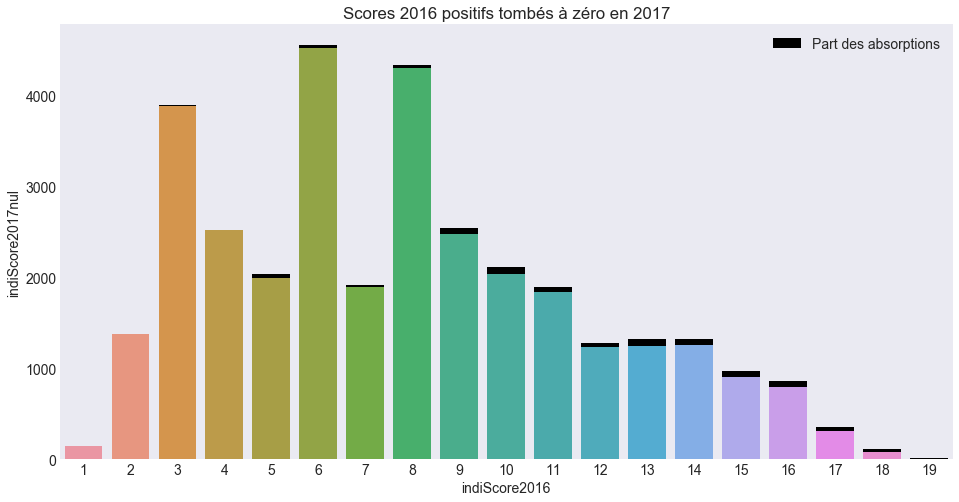

In [62]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(statsabs.indiScore2016, statsabs.siren, color='k', label="Part des absorptions")
sns.barplot(statszero.indiScore2016, statszero.indiScore2017nul)
plt.legend()
plt.title('Scores 2016 positifs tombés à zéro en 2017')

In [44]:
#plt.rc('font', weight='normal', size=14)
#fig = plt.figure(figsize=(16,8))
#plt.pie(statszero.indiScore2017nul, labels=statszero.indiScore2016, autopct = lambda x:'{:1.0f}%'.format(x))
#plt.axis('equal')
#plt.title('Scores 2016 positifs tombés à zéro en 2017')
#plt.show()

## Pourcentages

Text(0.5,1,'Pourcentage des scores 2016 positifs tombés à zéro en 2017')

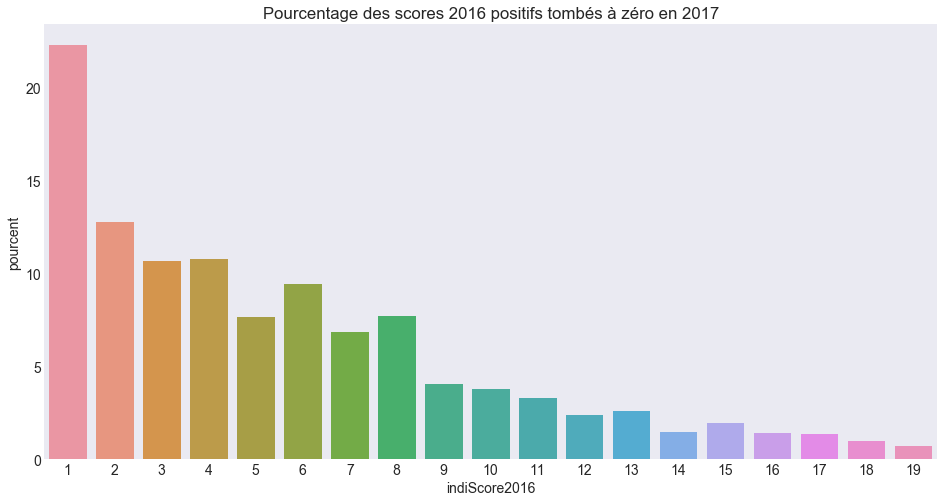

In [41]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(stats.indiScore2016, stats.pourcent)
plt.title('Pourcentage des scores 2016 positifs tombés à zéro en 2017')

### Scores à 18 ou 19

In [60]:
pd.set_option('display.max_rows', 100) 
topscores = dfzero[dfzero['indiScore2016']>=18]
topscores

,siren,indiScore2016,indiScoreDate2016,indiScore2017,indiScoreDate2017,procol
2466,71200299,18,2015-06-23,0,2016-01-29,NaN
3563,279200307,18,2013-10-22,0,2016-09-06,RR
26367,315985747,18,2014-04-11,0,2016-03-20,RR
26819,316329267,18,2014-03-12,0,2016-06-01,NaN
27703,316841360,18,2015-11-18,0,2016-04-27,RR
30835,318648029,18,2015-07-23,0,2016-08-18,RR
31209,318829330,18,2014-05-15,0,2016-02-09,RR
40539,323634121,18,2014-11-24,0,2016-08-11,RR
42690,324549112,18,2014-05-29,0,2016-03-18,RR
46425,326233111,18,2015-10-22,0,2016-06-01,NaN


In [63]:
lst = ''
for s in topscores.siren:
    lst += str(s) + ','
lst

'71200299,279200307,315985747,316329267,316841360,318648029,318829330,323634121,324549112,326233111,327946166,330712662,332200625,335075404,337696181,339039943,339502684,339671786,340927078,348303660,348890906,349250027,353283633,378587406,383517240,384756078,385246640,388321903,388564270,393600200,394179188,398130609,399305663,399886852,400638482,400941456,403643448,404217325,410356018,410962245,414954685,415110519,418030516,420390858,420536211,420865818,421108119,421363474,423395276,424271567,424415792,424782787,424796480,429083983,432700177,433163391,433313483,433518305,433701463,439837410,441620770,442995882,444164305,444470850,448078113,449297530,449471630,450175179,475581807,479185407,479927410,489147678,490850211,501009047,501448682,503396939,504176413,504503855,505094557,513303016,519560353,529093056,711621847,722045952,775618150,784145187,784198483,915722227,'